In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
import tensorflow as tf
import seaborn as sns
tf.test.gpu_device_name()

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
import ast
class allaction():
    
    def __init__(self, file):
        self.df = pd.read_csv(file) 
        # self.df = self.df.sample(frac=1, random_state=42).reset_index().drop("index", axis=1)
        self.orderId, self.taskId, self.taskTicks, self.workerId, self.workerTicks = [], [], [], [], []
        self.ResponseId, self.Round, self.Tick = [], [], []
    #taskId: 0~idle, 1~chop, 2~cook, 3~plate
    #workerId: 0~chef, 1~sou-chef, 2~server
    #           0~sou-chef, 1~server, CHANGE!!! 0~idle, 1~chef, 2~sou-chef, 3~server
    
    def parse(self):
        # all id + 1, leaving 0 to be idle
        action = self.df
        for i in tqdm(np.arange(action.shape[0])):
            row = action.iloc[i,:]
            for act in ["action1", "action2", "action3"]:
                # when there is no action in this act
                if type(row[act]) != str:
                    self.orderId.append(0)
                    self.taskId.append(0)
                    self.taskTicks.append(0)
                    self.workerId.append(0)
                    self.workerTicks.append(0)
                else:
                    a = ast.literal_eval(row[act])
                    self.orderId.append(a["order_id"] + 1)
                    self.taskId.append(a["task_id"] + 1)
                    self.taskTicks.append(a["task_ticks"])
                    self.workerId.append(a["worker_id"] + 1)
                    self.workerTicks.append(a["worker_ticks"])

                self.ResponseId.append(row["ResponseId"])
                self.Round.append(row["round"])
                self.Tick.append(row["tick"])
                
    def get(self):
        self.parse()
        d = {
            "ResponseId": self.ResponseId,
            "round": self.Round,
            "tick": self.Tick,
            "orderId": self.orderId, 
            "taskId": self.taskId, 
            "taskTicks": self.taskTicks, 
            "workerId": self.workerId, 
            "workerTicks": self.workerTicks
        }
        return pd.DataFrame(d)

In [13]:
actionS = pd.read_csv("S.csv")
actionS = actionS.loc[:, ["ResponseId", "round","tick",	"orderId","taskId","taskTicks",	"workerId"]]
actionS

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId
0,R_09f8RCjNyCadwPv,1,1,1,1,2,1
1,R_09f8RCjNyCadwPv,1,1,2,1,2,2
2,R_09f8RCjNyCadwPv,1,1,3,1,2,3
3,R_09f8RCjNyCadwPv,1,2,0,0,0,0
4,R_09f8RCjNyCadwPv,1,2,0,0,0,0
...,...,...,...,...,...,...,...
144991,R_yURk5fqt6tj7kjL,6,36,0,0,0,0
144992,R_yURk5fqt6tj7kjL,6,36,0,0,0,0
144993,R_yURk5fqt6tj7kjL,6,37,4,3,2,2
144994,R_yURk5fqt6tj7kjL,6,37,0,0,0,0


In [23]:
actionS = actionS[actionS["round"] <= 2]
actionS

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId
0,R_09f8RCjNyCadwPv,1,1,1,1,2,1
1,R_09f8RCjNyCadwPv,1,1,2,1,2,2
2,R_09f8RCjNyCadwPv,1,1,3,1,2,3
3,R_09f8RCjNyCadwPv,1,2,0,0,0,0
4,R_09f8RCjNyCadwPv,1,2,0,0,0,0
...,...,...,...,...,...,...,...
144535,R_yURk5fqt6tj7kjL,2,22,0,0,0,0
144536,R_yURk5fqt6tj7kjL,2,22,0,0,0,0
144537,R_yURk5fqt6tj7kjL,2,23,0,0,0,0
144538,R_yURk5fqt6tj7kjL,2,23,0,0,0,0


In [22]:
s1_label = pd.read_csv("s1_label.csv")
s1_label.columns = s1_label.iloc[0]
s1_label = s1_label.drop(0, axis=0)
s1_label = s1_label[(s1_label["Label"] == "3") | (s1_label["Label"] == "2")]
s1_label = s1_label[["ResponseId","Label"]]
s1_label

,ResponseId,Label
1,R_09f8RCjNyCadwPv,3
4,R_0dkmFxzVGbM4H17,3
5,R_0kTTXuzLnqZsQzT,2
7,R_10GbVmPNCebUOBA,3
8,R_10VgfXmESzXzuNR,2
...,...,...
243,R_uqBgjSJRC3HNk9H,3
244,R_vMpudMaMIAfBShP,2
245,R_wZQyUQosD7jAiC5,3
247,R_yBZYkqf9LaJZxFn,3


In [25]:
actionS

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId
0,R_09f8RCjNyCadwPv,1,1,1,1,2,1
1,R_09f8RCjNyCadwPv,1,1,2,1,2,2
2,R_09f8RCjNyCadwPv,1,1,3,1,2,3
3,R_09f8RCjNyCadwPv,1,2,0,0,0,0
4,R_09f8RCjNyCadwPv,1,2,0,0,0,0
...,...,...,...,...,...,...,...
144535,R_yURk5fqt6tj7kjL,2,22,0,0,0,0
144536,R_yURk5fqt6tj7kjL,2,22,0,0,0,0
144537,R_yURk5fqt6tj7kjL,2,23,0,0,0,0
144538,R_yURk5fqt6tj7kjL,2,23,0,0,0,0


In [26]:
action = actionS.merge(s1_label, how = "inner", left_on="ResponseId", right_on="ResponseId")
action = action.loc[:,["ResponseId", "round", "tick", "orderId", "taskId", "taskTicks", "workerId","Label"]]
action = action.rename(columns={"Label":"label"}) 
action["label"] = action["label"].astype(int)
action

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId,label
0,R_09f8RCjNyCadwPv,1,1,1,1,2,1,3
1,R_09f8RCjNyCadwPv,1,1,2,1,2,2,3
2,R_09f8RCjNyCadwPv,1,1,3,1,2,3,3
3,R_09f8RCjNyCadwPv,1,2,0,0,0,0,3
4,R_09f8RCjNyCadwPv,1,2,0,0,0,0,3
...,...,...,...,...,...,...,...,...
14062,R_yK1zeitEqOJSgEx,2,20,0,0,0,0,3
14063,R_yK1zeitEqOJSgEx,2,20,0,0,0,0,3
14064,R_yK1zeitEqOJSgEx,2,21,4,3,2,3,3
14065,R_yK1zeitEqOJSgEx,2,21,0,0,0,0,3


In [ ]:
% pwd

'/content'

In [142]:
file =  "phase2_action.csv"
action = allaction(file).get()
action = action[action["round"] <= 2]
action = action.drop("workerTicks", axis=1)
action

100%|██████████| 195642/195642 [00:40<00:00, 4827.29it/s]


,ResponseId,round,tick,orderId,taskId,taskTicks,workerId
0,R_09f8RCjNyCadwPv,1,1,1,1,2,1
1,R_09f8RCjNyCadwPv,1,1,2,1,2,2
2,R_09f8RCjNyCadwPv,1,1,3,1,2,3
3,R_09f8RCjNyCadwPv,1,2,0,0,0,0
4,R_09f8RCjNyCadwPv,1,2,0,0,0,0
...,...,...,...,...,...,...,...
586474,R_zffMypmlgQF5Yl3,2,18,0,0,0,0
586475,R_zffMypmlgQF5Yl3,2,18,0,0,0,0
586476,R_zffMypmlgQF5Yl3,2,19,4,3,2,3
586477,R_zffMypmlgQF5Yl3,2,19,0,0,0,0


In [143]:
label=pd.read_csv("label_after.csv").drop("Unnamed: 0", axis=1)
label = label.rename(columns={"Unnamed: 2":"label"})
label

,ResponseId,label,suggested_tip_disrupted
0,R_10HkPUkR6o0qDFT,9,Server cooks twice
1,R_1JCkfcOwq1eNbLu,9,"Make sure the server cooks twice, even if that..."
2,R_1K3WThoBHDDfbk0,9,the server needs to cook twice
3,R_1M40hSm4fF4Saxv,9,Server cooks twice
4,R_1Q5tRaFyI9DwIn4,9,Make the server cook twice
...,...,...,...
285,R_XoEfxfWvLu2dznr,8,good
286,R_2s5D6EJ0FlMyr39,8,0.5
287,R_2Vf01KGZrR5fscp,1,leave some chefs idle
288,R_38EvwAyoLTJRsZP,8,game didn't load


In [146]:
##################
label = label[(label["label"] == 2) | (label["label"] == 9)]
label

,ResponseId,label,suggested_tip_disrupted
0,R_10HkPUkR6o0qDFT,9,Server cooks twice
1,R_1JCkfcOwq1eNbLu,9,"Make sure the server cooks twice, even if that..."
2,R_1K3WThoBHDDfbk0,9,the server needs to cook twice
3,R_1M40hSm4fF4Saxv,9,Server cooks twice
4,R_1Q5tRaFyI9DwIn4,9,Make the server cook twice
...,...,...,...
267,R_2coTrhEsqh7YIZU,9,Keep the server busy cooking twice and plating...
273,R_eJQBiO90iCajndD,2,Let the sous-chef do the cooking
276,R_1l0ufVo1UIVBZvz,2,Let Sous-Chef cook since they are faster at it
278,R_2vk1hthUj2uRVYM,2,Server shouldn't cook.


In [27]:
########## s1
label = action[["ResponseId", "label"]]
label

,ResponseId,label
0,R_09f8RCjNyCadwPv,3
1,R_09f8RCjNyCadwPv,3
2,R_09f8RCjNyCadwPv,3
3,R_09f8RCjNyCadwPv,3
4,R_09f8RCjNyCadwPv,3
...,...,...
14062,R_yK1zeitEqOJSgEx,3
14063,R_yK1zeitEqOJSgEx,3
14064,R_yK1zeitEqOJSgEx,3
14065,R_yK1zeitEqOJSgEx,3


In [28]:
action

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId,label
0,R_09f8RCjNyCadwPv,1,1,1,1,2,1,3
1,R_09f8RCjNyCadwPv,1,1,2,1,2,2,3
2,R_09f8RCjNyCadwPv,1,1,3,1,2,3,3
3,R_09f8RCjNyCadwPv,1,2,0,0,0,0,3
4,R_09f8RCjNyCadwPv,1,2,0,0,0,0,3
...,...,...,...,...,...,...,...,...
14062,R_yK1zeitEqOJSgEx,2,20,0,0,0,0,3
14063,R_yK1zeitEqOJSgEx,2,20,0,0,0,0,3
14064,R_yK1zeitEqOJSgEx,2,21,4,3,2,3,3
14065,R_yK1zeitEqOJSgEx,2,21,0,0,0,0,3


In [29]:
action

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId,label
0,R_09f8RCjNyCadwPv,1,1,1,1,2,1,3
1,R_09f8RCjNyCadwPv,1,1,2,1,2,2,3
2,R_09f8RCjNyCadwPv,1,1,3,1,2,3,3
3,R_09f8RCjNyCadwPv,1,2,0,0,0,0,3
4,R_09f8RCjNyCadwPv,1,2,0,0,0,0,3
...,...,...,...,...,...,...,...,...
14062,R_yK1zeitEqOJSgEx,2,20,0,0,0,0,3
14063,R_yK1zeitEqOJSgEx,2,20,0,0,0,0,3
14064,R_yK1zeitEqOJSgEx,2,21,4,3,2,3,3
14065,R_yK1zeitEqOJSgEx,2,21,0,0,0,0,3


In [20]:
action = action.merge(label,how = "inner",
            left_on="ResponseId", right_on="ResponseId")
y = action["label"]
action = action.iloc[:,0:7]
action

KeyError: 'label'

In [8]:
action

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId,label
0,R_09f8RCjNyCadwPv,1,1,1,1,2,1,3
1,R_09f8RCjNyCadwPv,1,1,2,1,2,2,3
2,R_09f8RCjNyCadwPv,1,1,3,1,2,3,3
3,R_09f8RCjNyCadwPv,1,2,0,0,0,0,3
4,R_09f8RCjNyCadwPv,1,2,0,0,0,0,3
...,...,...,...,...,...,...,...,...
14062,R_yK1zeitEqOJSgEx,2,20,0,0,0,0,3
14063,R_yK1zeitEqOJSgEx,2,20,0,0,0,0,3
14064,R_yK1zeitEqOJSgEx,2,21,4,3,2,3,3
14065,R_yK1zeitEqOJSgEx,2,21,0,0,0,0,3


In [30]:
############# s1
y = action["label"]
action = action.iloc[:,0:7]
action

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId
0,R_09f8RCjNyCadwPv,1,1,1,1,2,1
1,R_09f8RCjNyCadwPv,1,1,2,1,2,2
2,R_09f8RCjNyCadwPv,1,1,3,1,2,3
3,R_09f8RCjNyCadwPv,1,2,0,0,0,0
4,R_09f8RCjNyCadwPv,1,2,0,0,0,0
...,...,...,...,...,...,...,...
14062,R_yK1zeitEqOJSgEx,2,20,0,0,0,0
14063,R_yK1zeitEqOJSgEx,2,20,0,0,0,0
14064,R_yK1zeitEqOJSgEx,2,21,4,3,2,3
14065,R_yK1zeitEqOJSgEx,2,21,0,0,0,0


In [31]:
y.unique()

array([3, 2])

In [32]:
y = action.merge(label,how = "inner",
            left_on="ResponseId", right_on="ResponseId").groupby("ResponseId").agg(np.mean)["label"].astype(int)
y = y-1
y

ResponseId
R_09f8RCjNyCadwPv    2
R_0dkmFxzVGbM4H17    2
R_0kTTXuzLnqZsQzT    1
R_10GbVmPNCebUOBA    2
R_10VgfXmESzXzuNR    1
                    ..
R_uqBgjSJRC3HNk9H    2
R_vMpudMaMIAfBShP    1
R_wZQyUQosD7jAiC5    2
R_yBZYkqf9LaJZxFn    2
R_yK1zeitEqOJSgEx    2
Name: label, Length: 104, dtype: int64

In [33]:
t1 = action.drop("orderId", axis=1)
t2 = t1.merge(pd.get_dummies(t1["taskId"]), left_index=True, right_index=True).drop("taskId", axis=1).rename(
    columns={0:"idle", 1:"chop", 2:"cook", 3:"plate"})
df = t2.merge(pd.get_dummies(t2["workerId"]), left_index=True, right_index=True).drop("workerId", axis=1).rename(
    columns={0:"idle", 1:"chef", 2:"sou-chef", 3:"server"})
df.drop("taskTicks", axis=1).groupby(["ResponseId", "round", "tick"]).sum().iloc[:,1:]

chop  cook  plate  idle  chef  sou-chef  server
ResponseId        round tick                                                 
R_09f8RCjNyCadwPv 1     1        3     0      0     0     1         1       1
                        2        0     0      0     3     0         0       0
                        3        0     1      0     2     1         0       0
                        4        0     1      0     2     0         1       0
                        5        0     0      0     3     0         0       0
...                            ...   ...    ...   ...   ...       ...     ...
R_yK1zeitEqOJSgEx 2     17       0     0      0     3     0         0       0
                        18       0     0      0     3     0         0       0
                        19       0     0      0     3     0         0       0
                        20       0     0      0     3     0         0       0
                        21       0     0      1     2     0         0       1

[4689 rows x 7 columns]

In [34]:
y

ResponseId
R_09f8RCjNyCadwPv    2
R_0dkmFxzVGbM4H17    2
R_0kTTXuzLnqZsQzT    1
R_10GbVmPNCebUOBA    2
R_10VgfXmESzXzuNR    1
                    ..
R_uqBgjSJRC3HNk9H    2
R_vMpudMaMIAfBShP    1
R_wZQyUQosD7jAiC5    2
R_yBZYkqf9LaJZxFn    2
R_yK1zeitEqOJSgEx    2
Name: label, Length: 104, dtype: int64

In [35]:
df = df.merge(pd.DataFrame(y), how="left",left_on="ResponseId", right_index=True)
df = df[(df["label"] == 1) | (df["label"] == 2)]
df

,ResponseId,round,tick,taskTicks,idle,chop,cook,plate,idle,chef,sou-chef,server,label
0,R_09f8RCjNyCadwPv,1,1,2,0,1,0,0,0,1,0,0,2
1,R_09f8RCjNyCadwPv,1,1,2,0,1,0,0,0,0,1,0,2
2,R_09f8RCjNyCadwPv,1,1,2,0,1,0,0,0,0,0,1,2
3,R_09f8RCjNyCadwPv,1,2,0,1,0,0,0,1,0,0,0,2
4,R_09f8RCjNyCadwPv,1,2,0,1,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14062,R_yK1zeitEqOJSgEx,2,20,0,1,0,0,0,1,0,0,0,2
14063,R_yK1zeitEqOJSgEx,2,20,0,1,0,0,0,1,0,0,0,2
14064,R_yK1zeitEqOJSgEx,2,21,2,0,0,0,1,0,0,0,1,2
14065,R_yK1zeitEqOJSgEx,2,21,0,1,0,0,0,1,0,0,0,2


In [36]:
a = df.drop("taskTicks", axis=1)
X = a.groupby(["ResponseId", "round", "tick", "label"]).agg(lambda x: x.iloc[0]).merge(
    a.groupby(["ResponseId", "round", "tick", "label"]).agg(lambda x: x.iloc[1]).merge(
        a.groupby(["ResponseId", "round", "tick", "label"]).agg(lambda x: x.iloc[2])
    , left_index=True, right_index=True), left_index=True, right_index=True)

In [37]:
X

idle  chop  cook  plate  idle  chef  \
ResponseId        round tick label                                        
R_09f8RCjNyCadwPv 1     1    2         0     1     0      0     0     1   
                        2    2         1     0     0      0     1     0   
                        3    2         0     0     1      0     0     1   
                        4    2         0     0     1      0     0     0   
                        5    2         1     0     0      0     1     0   
...                                  ...   ...   ...    ...   ...   ...   
R_yK1zeitEqOJSgEx 2     17   2         1     0     0      0     1     0   
                        18   2         1     0     0      0     1     0   
                        19   2         1     0     0      0     1     0   
                        20   2         1     0     0      0     1     0   
                        21   2         0     0     0      1     0     0   

                                    sou-chef  server  idle_x  chop_x  ...  \
ResponseId        round tick label                                    ...   
R_09f8RCjNyCadwPv 1     1    2             0       0       0       1  ...   
                        2    2             0       0       1       0  ...   
                        3    2             0       0       1       0  ...   
                        4    2             1       0       1       0  ...   
                        5    2             0       0       1       0  ...   
...                                      ...     ...     ...     ...  ...   
R_yK1zeitEqOJSgEx 2     17   2             0       0       1       0  ...   
                        18   2             0       0       1       0  ...   
                        19   2             0       0       1       0  ...   
                        20   2             0       0       1       0  ...   
                        21   2             0       1       1       0  ...   

                                    sou-chef_x  server_x  idle_y  chop_y  \
ResponseId        round tick label                                         
R_09f8RCjNyCadwPv 1     1    2               1         0       0       1   
                        2    2               0         0       1       0   
                        3    2               0         0       1       0   
                        4    2               0         0       1       0   
                        5    2               0         0       1       0   
...                                        ...       ...     ...     ...   
R_yK1zeitEqOJSgEx 2     17   2               0         0       1       0   
                        18   2               0         0       1       0   
                        19   2               0         0       1       0   
                        20   2               0         0       1       0   
                        21   2               0         0       1       0   

                                    cook_y  plate_y  idle_y  chef_y  \
ResponseId        round tick label                                    
R_09f8RCjNyCadwPv 1     1    2           0        0       0       0   
                        2    2           0        0       1       0   
                        3    2           0        0       1       0   
                        4    2           0        0       1       0   
                        5    2           0        0       1       0   
...                                    ...      ...     ...     ...   
R_yK1zeitEqOJSgEx 2     17   2           0        0       1       0   
                        18   2           0        0       1       0   
                        19   2           0        0       1       0   
                        20   2           0        0       1       0   
                        21   2           0        0       1       0   

                                    sou-chef_y  server_y  
ResponseId        round tick label                        
R_09f8RCjNyCadwPv 1     1  

In [38]:
from tqdm import tqdm

In [39]:
# chop0, chef0, server3
embeddings = []
for i in tqdm(np.arange(X.shape[0])):
    embedding = [0,0,0,0,0,0,0,0,0]
    thisline = X.iloc[i,:]
    
    if thisline["chop"] and thisline["chef"]:
        embedding[0] = 1
    elif thisline["chop"] and thisline["sou-chef"]:
        embedding[1] = 1
    elif thisline["chop"] and thisline["server"]:
        embedding[2] = 1 
    elif thisline["cook"] and thisline["chef"]:
        embedding[3] = 1 
    elif thisline["cook"] and thisline["sou-chef"]:
        embedding[4] = 1
    elif thisline["cook"] and thisline["server"]:
        embedding[5] = 1 
    elif thisline["plate"] and thisline["chef"]:
        embedding[6] = 1 
    elif thisline["plate"] and thisline["sou-chef"]:
        embedding[7] = 1
    elif thisline["plate"] and thisline["server"]:
        embedding[8] = 1 
        
    if thisline["chop_x"] and thisline["chef_x"]:
        embedding[0] = 1
    elif thisline["chop_x"] and thisline["sou-chef_x"]:
        embedding[1] = 1
    elif thisline["chop_x"] and thisline["server_x"]:
        embedding[2] = 1 
    elif thisline["cook_x"] and thisline["chef_x"]:
        embedding[3] = 1 
    elif thisline["cook_x"] and thisline["sou-chef_x"]:
        embedding[4] = 1
    elif thisline["cook_x"] and thisline["server_x"]:
        embedding[5] = 1 
    elif thisline["plate_x"] and thisline["chef_x"]:
        embedding[6] = 1 
    elif thisline["plate_x"] and thisline["sou-chef_x"]:
        embedding[7] = 1
    elif thisline["plate_x"] and thisline["server_x"]:
        embedding[8] = 1         
        
    if thisline["chop_y"] and thisline["chef_y"]:
        embedding[0] = 1
    elif thisline["chop_y"] and thisline["sou-chef_y"]:
        embedding[1] = 1
    elif thisline["chop_y"] and thisline["server_y"]:
        embedding[2] = 1 
    elif thisline["cook_y"] and thisline["chef_y"]:
        embedding[3] = 1 
    elif thisline["cook_y"] and thisline["sou-chef_y"]:
        embedding[4] = 1
    elif thisline["cook_y"] and thisline["server_y"]:
        embedding[5] = 1 
    elif thisline["plate_y"] and thisline["chef_y"]:
        embedding[6] = 1 
    elif thisline["plate_y"] and thisline["sou-chef_y"]:
        embedding[7] = 1
    elif thisline["plate_y"] and thisline["server_y"]:
        embedding[8] = 1  
    
    embeddings.append(embedding)
   

100%|██████████| 4689/4689 [00:01<00:00, 2600.90it/s]


In [40]:
kkk = df.drop("taskTicks", axis=1).groupby(["ResponseId", "round", "tick", "label"]).sum().iloc[:,1:]
kkk["index"] = np.arange(kkk.shape[0])
X = kkk.merge(pd.DataFrame(np.array(embeddings)),how="left", left_on="index", right_index=True).drop(
    "chop", axis=1).drop("cook", axis=1).drop("plate", axis=1).drop("idle", axis=1).drop(
    "chef", axis=1).drop("sou-chef", axis=1).drop("server", axis=1).drop("index", axis=1)
X = X.reset_index()
X

,ResponseId,round,tick,label,0,1,2,3,4,5,6,7,8
0,R_09f8RCjNyCadwPv,1,1,2,1,1,1,0,0,0,0,0,0
1,R_09f8RCjNyCadwPv,1,2,2,0,0,0,0,0,0,0,0,0
2,R_09f8RCjNyCadwPv,1,3,2,0,0,0,1,0,0,0,0,0
3,R_09f8RCjNyCadwPv,1,4,2,0,0,0,0,1,0,0,0,0
4,R_09f8RCjNyCadwPv,1,5,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,R_yK1zeitEqOJSgEx,2,17,2,0,0,0,0,0,0,0,0,0
4685,R_yK1zeitEqOJSgEx,2,18,2,0,0,0,0,0,0,0,0,0
4686,R_yK1zeitEqOJSgEx,2,19,2,0,0,0,0,0,0,0,0,0
4687,R_yK1zeitEqOJSgEx,2,20,2,0,0,0,0,0,0,0,0,0


In [162]:
# id = X.groupby(["ResponseId","tick").agg(lambda x: x.iloc[0])
# id = id.sample(frac=1, random_state=42)
# TRAIN = id.iloc[:200,:]
# TEST = id.iloc[200:,:]
# TRAIN

In [ ]:
# sns.histplot(data=TRAIN, x="label")

In [ ]:
# sns.histplot(data=TEST, x="label")

In [35]:
# import imblearn
# from imblearn.over_sampling import RandomOverSampler

In [ ]:
# TRAIN["id"] = TRAIN.index
# TRAIN

In [ ]:
# oversample = RandomOverSampler(sampling_strategy="not minority")
# jisoo, mmy = oversample.fit_resample(TRAIN.drop("label", axis=1), TRAIN["label"])
# oversample2 = RandomOverSampler(sampling_strategy="minority")
# jisoo, mmy = oversample2.fit_resample(jisoo, mmy)
# sampled = jisoo.merge(mmy, left_index=True, right_index=True)
# sampled = sampled.merge(TRAIN, how="left", left_on="id", right_on="id")
# sampled = sampled.drop(['round_y', 'tick_y', 'label_y', '0_y',
#        '1_y', '2_y', '3_y', '4_y', '5_y', '6_y', '7_y', '8_y'], axis=1)
# sampled = sampled.rename(columns={
#     "round_x":"round",
#     "tick_x":"tick",
#     "0_x":"0",
#     "1_x":"1",
#     "2_x":"2",
#     "3_x":"3",
#     "4_x":"4",
#     "5_x":"5",
#     "6_x":"6",
#     "7_x":"7",
#     "8_x":"8",
#     "label_x":"label",
#     "id":"ResponseId"
# })
# sampled = sampled.set_index("ResponseId")
# TRAIN = sampled.iloc[:,[0,1,11,2,3,4,5,6,7,8,9,10]]
# TRAIN

In [ ]:
# TEST

In [41]:
# after = pd.DataFrame(mmy).reset_index()
# sns.histplot(data=after, x="label")
max(X.groupby("ResponseId").count()["round"])

69

In [42]:
max_time_tick = max(X.groupby("ResponseId").count()["round"])
max_time_tick = 59

In [49]:
X 

In [44]:
# TRAIN["newId"] = np.arange(531)
# TRAIN["round"].unique()

In [46]:
data = []
for player in tqdm(set(X["ResponseId"])):
    batch = np.array(X[X["ResponseId"] == player].iloc[:,4:]).tolist()
    padding = max_time_tick - len(batch)
    if padding > 0  :
        for _ in np.arange(padding):
            batch.append([0,0,0,0,0,0,0,0,0])
    data.append(batch[:59])

100%|██████████| 104/104 [00:00<00:00, 1309.84it/s]


In [47]:
tensor = np.array(data)
tensor

array([[[0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [42]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=5)

In [168]:
bestcnn = keras.models.load_model("drive/MyDrive/model-cnn")

In [169]:
T1_result = bestcnn.predict(tensor)
T1_result

array([[0.5296607 , 0.49419162],
       [0.50187683, 0.4842138 ],
       [0.53572357, 0.47191912],
       [0.5296607 , 0.49419162],
       [0.5296607 , 0.49419162],
       [0.54388005, 0.47184163],
       [0.53754735, 0.5115811 ],
       [0.529072  , 0.48897734],
       [0.5157455 , 0.4827172 ],
       [0.5310573 , 0.49329594],
       [0.5254176 , 0.44887787],
       [0.52614886, 0.4939729 ],
       [0.51660293, 0.47762352],
       [0.52963233, 0.4957424 ],
       [0.52639234, 0.4581023 ],
       [0.5072679 , 0.5197733 ],
       [0.53057235, 0.47401294],
       [0.5204019 , 0.4924813 ],
       [0.51095253, 0.5275631 ],
       [0.5107432 , 0.49380755],
       [0.5087284 , 0.4854095 ],
       [0.5252107 , 0.49313053],
       [0.536066  , 0.48778635],
       [0.5278269 , 0.50006145],
       [0.51624036, 0.51429194],
       [0.5360229 , 0.50067055],
       [0.5210865 , 0.45392752],
       [0.5296607 , 0.49419162],
       [0.5218818 , 0.5157749 ],
       [0.5287262 , 0.47634083],
       [0.

In [ ]:
S1

In [41]:
# new_tensor = []
# for ten in tqdm(tensor):
#   pca.fit(ten)
#   new_tensor.append(pca.transform(ten).tolist())
# new_tensor = np.array(new_tensor)
# new_tensor

In [70]:

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
y = X.groupby("ResponseId").agg(np.mean)["label"].astype(int)
y = y - 1

In [ ]:
# y += 1

In [ ]:
max(y)

1

In [ ]:
X_train, y_train = tensor[:70], y[:70]
X_test, y_test = tensor[70:], y[70:]
X_train.shape

(70, 59, 9)

In [ ]:
x_id = np.arange(70)

In [ ]:
# oversample = RandomOverSampler(sampling_strategy="not minority")
# jisoo, mmy = oversample.fit_resample(x_id.reshape(-1, 1), y_train)
oversample2 = RandomOverSampler(sampling_strategy="minority")
id, y_train_new = oversample2.fit_resample(x_id.reshape(-1, 1), y_train)
new = []
for i in tqdm(id.squeeze()):
  new.append(X_train[i].tolist())
X_train_new =  np.array(new)
y_train_new.shape[0] == X_train_new.shape[0]

100%|██████████| 106/106 [00:00<00:00, 19566.77it/s]


True

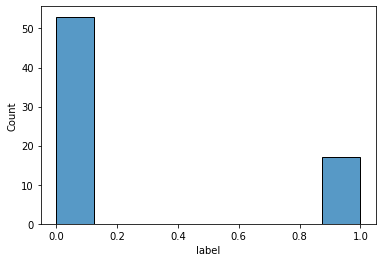

In [ ]:
sns.histplot(y_train)

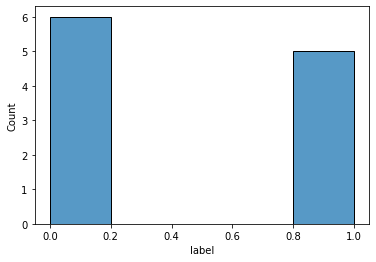

In [ ]:
sns.histplot(y_test)

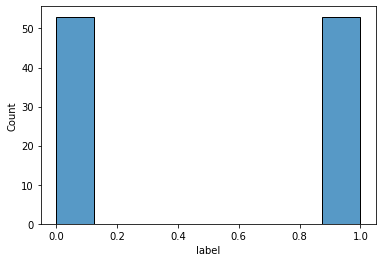

In [ ]:
sns.histplot(y_train_new)

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=5, kernel_size=10, padding="same", activation="relu", kernel_regularizer = "l1")(x)
    x = layers.Conv1D(filters=8, kernel_size=8, padding="same", activation="relu", kernel_regularizer = "l1")(x)
    x = layers.Conv1D(filters=10, kernel_size=6, padding="same", activation="relu", kernel_regularizer = "l1")(x)
    # x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=16, kernel_size=6, padding="same",activation="relu", kernel_regularizer = "l1")(x)
    x = layers.Conv1D(filters=10, kernel_size=6, padding="same",activation="relu", kernel_regularizer = "l1")(x)
    x = layers.Conv1D(filters=8, kernel_size=5, padding="same",activation="relu", kernel_regularizer = "l1")(x)
    x = layers.Conv1D(filters=8, kernel_size=3, padding="same", activation="relu", kernel_regularizer = "l1")(x)
    x = layers.Conv1D(filters=5, kernel_size=1, padding="same", activation="relu", kernel_regularizer = "l1")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
    n_classes = 2
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    # for dim in mlp_units:
    # x = layers.Dense(256, activation="relu", kernel_regularizer = "l1")(x)
    # x = layers.Dense(128, activation="relu", kernel_regularizer = "l1")(x)
    # x = layers.Dense(64, activation="relu", kernel_regularizer = "l1")(x)
    # x = layers.Dense(32, activation="relu", kernel_regularizer = "l1")(x)
    x = layers.Dense(16, activation="relu", kernel_regularizer = "l1")(x)
    # x = layers.Dense(8, activation="relu", kernel_regularizer = "l1")(x)
    outputs = layers.Dense(n_classes, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=128,
    num_heads=5,
    ff_dim=3,
    num_transformer_blocks=5,
    mlp_units=[128],
    mlp_dropout=0.35,
    dropout=0.25,
    # n_classes = 10
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    metrics=["accuracy"],
)
history = model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=1000, restore_best_weights=True)]

curve = model.fit(
    X_train_new,
    y_train_new,
    validation_split=0.3,
    epochs=500,
    batch_size=16,
    #callbacks=callbacks,
)

model.evaluate(X_test, y_test, verbose=1)

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 59, 9)]           0         
                                                                 
 global_average_pooling1d_22  (None, 59)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_67 (Dense)            (None, 16)                960       
                                                                 
 dense_68 (Dense)            (None, 2)                 34        
                                                                 
Total params: 994
Trainable params: 994
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 52s 41ms/step - loss: 2.0287 - accuracy: 0.2703 - val_loss: 1.9369 - val_ac

[1.9507091045379639, 0.4545454680919647]

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
y_pred = model.predict(X_test)
loss(y_test, y_pred).numpy()

0.6915655

In [ ]:
tf.keras.models.save_model(model, "drive/MyDrive/model-lajii")

INFO:tensorflow:Assets written to: drive/MyDrive/model-lajii/assets


INFO:tensorflow:Assets written to: drive/MyDrive/model-lajii/assets


In [ ]:
# tf.keras.models.save_model(model, "drive/MyDrive/model") [63.6%, 0.64]
from tensorflow import keras
bestcnn = keras.models.load_model("drive/MyDrive/model-cnn")
loss(y_test, bestcnn.predict(X_test)).numpy()

0.6780724

In [ ]:
sum(extract(bestcnn.predict(X_test)) == y_test) / len(y_test)

0.8181818181818182

In [ ]:
lgs = np.array([[0.76775377, 0.23224623],
       [0.80568263, 0.19431737],
       [0.77134002, 0.22865998],
       [0.80576185, 0.19423815],
       [0.81368899, 0.18631101],
       [0.72097612, 0.27902388],
       [0.8443664 , 0.1556336 ],
       [0.72886286, 0.27113714],
       [0.76955178, 0.23044822],
       [0.72886286, 0.27113714],
       [0.57655722, 0.42344278]])
loss(y_test, lgs).numpy() #45.4% acc

0.8743009567260742

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rdf = np.array([[0.89439941, 0.10560059],
       [0.75517961, 0.24482039],
       [0.96165656, 0.03834344],
       [0.84703585, 0.15296415],
       [0.52440739, 0.47559261],
       [0.71204656, 0.28795344],
       [0.66654105, 0.33345895],
       [0.40143291, 0.59856709],
       [0.6661758 , 0.3338242 ],
       [0.40143291, 0.59856709],
       [0.42057609, 0.57942391]])
loss(y_test, rdf).numpy() #54.5% acc

1.1236058473587036

In [ ]:
knn = np.array([[1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.66666667, 0.33333333]])
loss(y_test, rdf).numpy() #63.3

1.1236058473587036

In [ ]:
y_pred

array([[0.00979517, 0.9655937 ],
       [0.01055949, 0.9638289 ],
       [0.99971503, 0.00511207],
       [0.9979874 , 0.01792961],
       [0.99987304, 0.00303184],
       [0.9996418 , 0.00592338],
       [0.99893373, 0.01194095],
       [0.99498665, 0.0320184 ],
       [0.9980428 , 0.01762359],
       [0.9996258 , 0.00606946],
       [0.9988772 , 0.01235136]], dtype=float32)

In [ ]:
def extract(arr):
  out = []
  for weights in arr:
    max_weights = np.argmax(weights)
    out.append(max_weights)
  return out

In [ ]:
sum(extract(model.predict(X_test)) == y_test) / len(y_test)

0.7272727272727273

In [ ]:
sum(np.array(extract(model.predict(X_train))) == y_train) / len(y_train)

1.0

In [ ]:
y_pred = np.array(extract(model.predict(X_test))) 
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
np.array(y_test)

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = y_pred
matrix = confusion_matrix(y_test, y_pred)
im = plt.imshow(matrix)
plt.colorbar(im)
plt.show()

ValueError: ignored

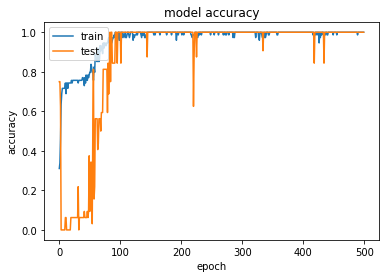

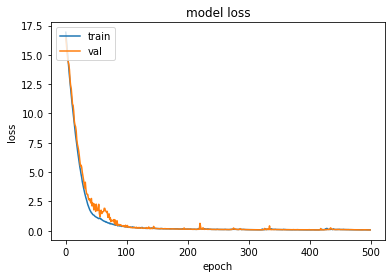

In [ ]:
plt.plot(curve.history['accuracy'])
plt.plot(curve.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(curve.history['loss'])
plt.plot(curve.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()